# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
sns.set_theme(style='darkgrid',palette = 'rainbow')
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
td = pd.read_csv('Titanic_train.csv')
td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

In [3]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
td.shape

(891, 12)

In [5]:
td.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
td.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Visualisation

<Figure size 3000x2500 with 0 Axes>

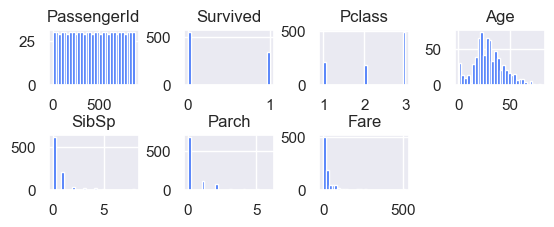

In [7]:
# Histogram

plt.figure(figsize=(30,25))
plt.tight_layout()
td.hist(layout=(4,4),bins=30)
plt.subplots_adjust(hspace = 0.9,wspace = 0.5)
plt.show()

Text(0.5, 1.0, 'Titanic')

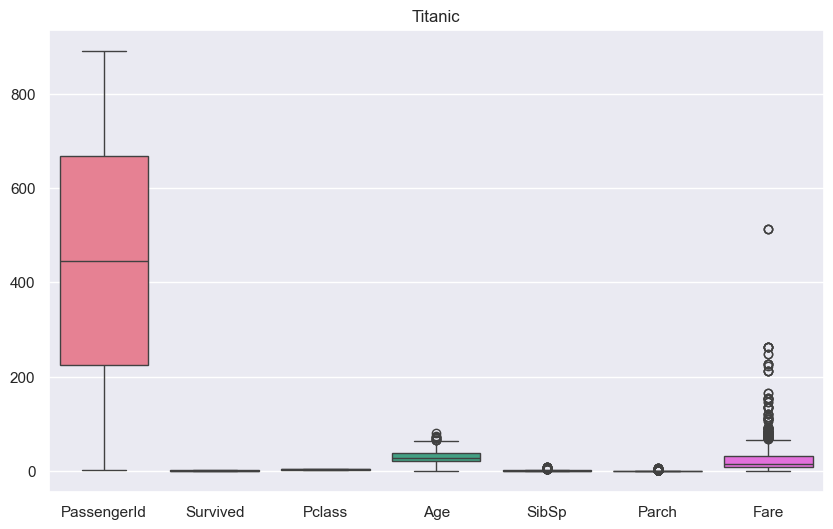

In [8]:
# Boxplot

plt.figure(figsize=(10,6))
sns.boxplot(td)
plt.title("Titanic")

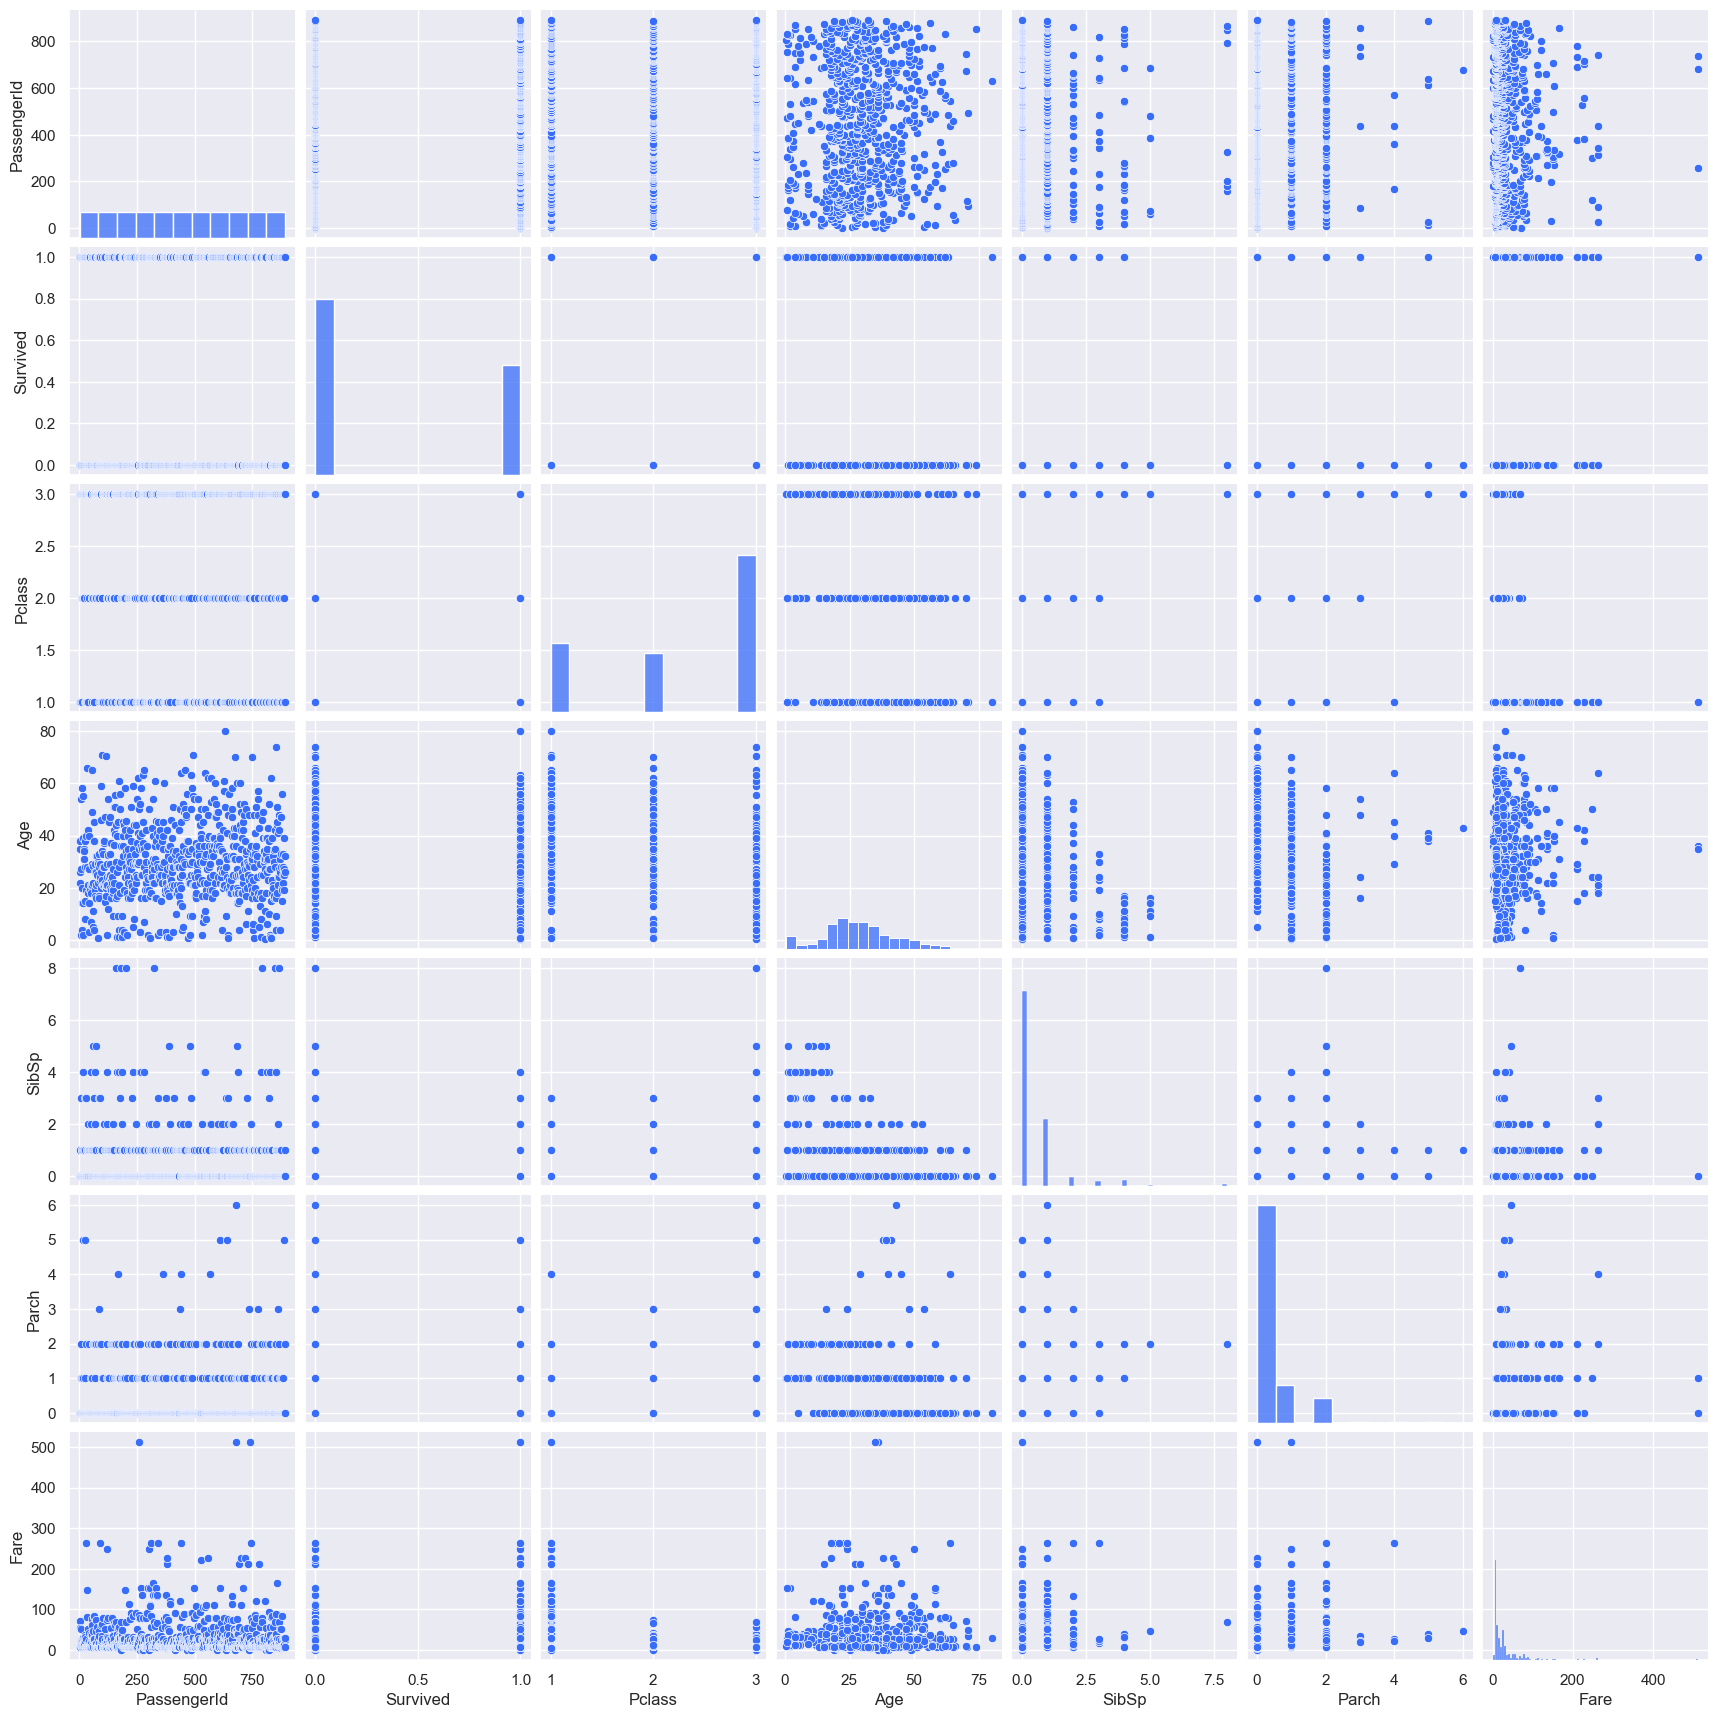

In [8]:
# pairplot
sns.pairplot(td)

# Date Preprocessing of training Data

- As we saw earlier there are few columns that are missing some data. We need to clean our dataset before we begin to train our logistic regression model. Lets first try and fill in the missing age values. I'm going to do this by filling in the missing age with the mean age of the passenger class that the passenger belongs to.

In [9]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


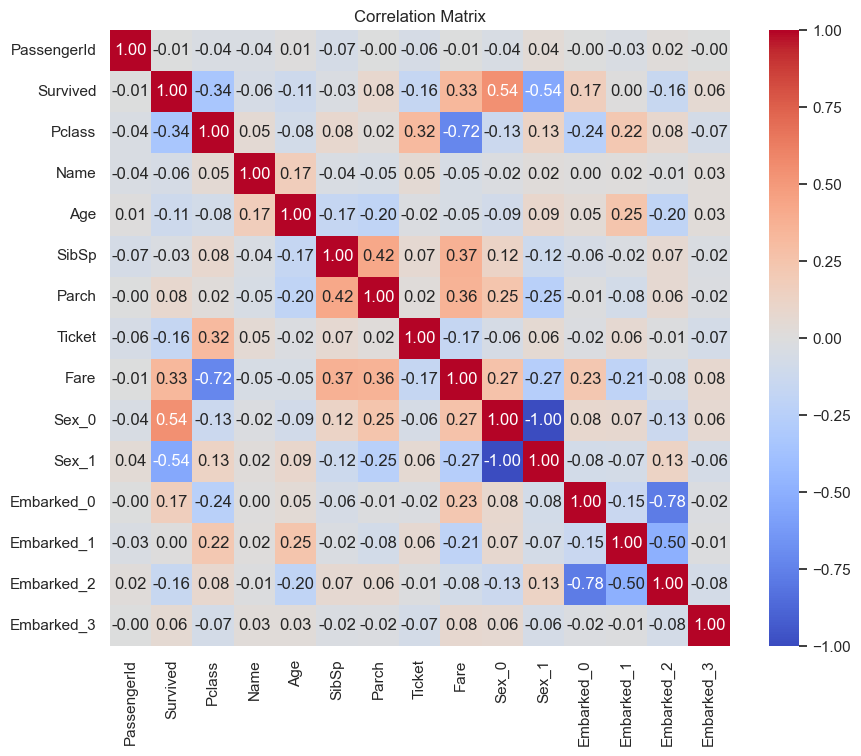

In [18]:
# Correlation of the data
correlation_matrix =td.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# checking for null values
td.isnull().sum()

In [ ]:
# as we can see that there are too many null values in Age columns so replacing it with mean.

td['Age'] = td['Age'].fillna(td['Age'].mean())

In [12]:
# checking the null values

td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Now Dropping Unwanted Columns

td.drop(columns=['Cabin'],inplace=True) # because maximun valuse are null


In [14]:
# Encoding Categorical 

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for columns in td.columns:
    td[columns]=labelencoder.fit_transform(td[columns])

In [15]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,2,108,1,28,1,0,523,18,2
1,1,1,0,190,0,51,1,0,596,207,0
2,2,1,2,353,0,34,0,0,669,41,2
3,3,1,0,272,0,47,1,0,49,189,2
4,4,0,2,15,1,47,0,0,472,43,2


In [16]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,2,108,1,28,1,0,523,18,2
1,1,1,0,190,0,51,1,0,596,207,0
2,2,1,2,353,0,34,0,0,669,41,2
3,3,1,0,272,0,47,1,0,49,189,2
4,4,0,2,15,1,47,0,0,472,43,2


In [17]:
# converting object 

td = pd.get_dummies(td,columns=['Sex','Embarked'],dtype=int)
td

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Embarked_3
0,0,0,2,108,28,1,0,523,18,0,1,0,0,1,0
1,1,1,0,190,51,1,0,596,207,1,0,1,0,0,0
2,2,1,2,353,34,0,0,669,41,1,0,0,0,1,0
3,3,1,0,272,47,1,0,49,189,1,0,0,0,1,0
4,4,0,2,15,47,0,0,472,43,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,1,548,35,0,0,101,85,0,1,0,0,1,0
887,887,1,0,303,24,0,0,14,153,1,0,0,0,1,0
888,888,0,2,413,88,1,2,675,131,1,0,0,0,1,0
889,889,1,0,81,34,0,0,8,153,0,1,1,0,0,0


# Now cleaning the Test Data set

In [20]:
ted = pd.read_csv('Titanic_test.csv')
ted

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [21]:
# checking for null values
ted.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
# as we can see that there are too many null values in Age columns so replacing it with mean.

ted['Age'] = ted['Age'].fillna(ted['Age'].mean())
ted

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [23]:
# Now Dropping Unwanted Columns

ted.drop(columns=['Cabin'],inplace=True)
ted.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [24]:
# converting object 

ted = pd.get_dummies(ted,columns=['Sex','Embarked'],dtype=int)
ted.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,1,0,0,0,1


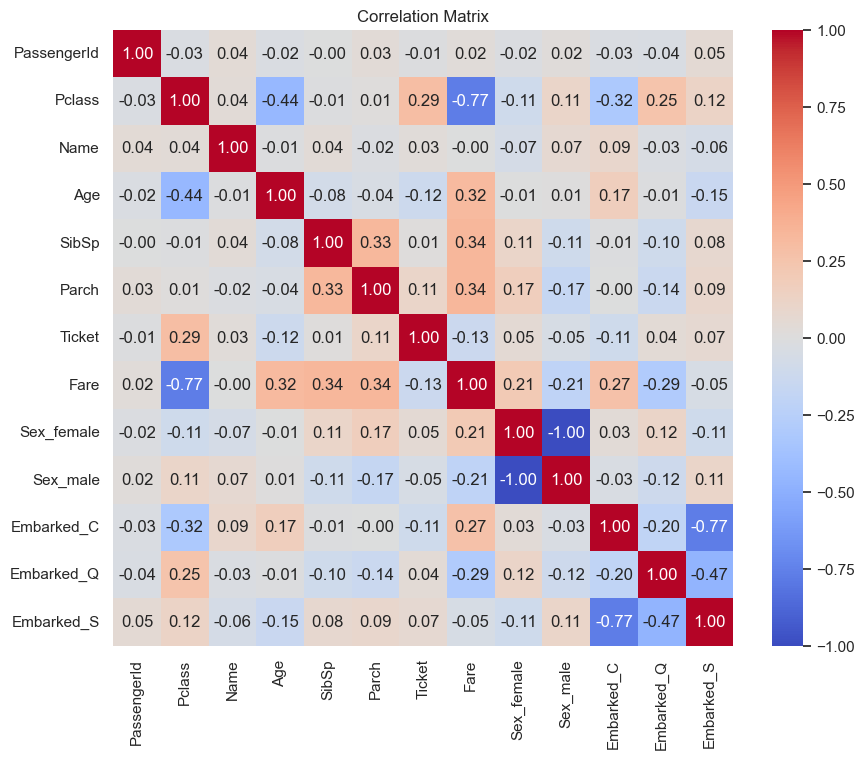

In [27]:
# Calculate correlation matrix
correlation_matrix = ted.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [28]:
# Encoding Categorical 

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for columns in ted.columns:
    ted[columns]=labelencoder.fit_transform(ted[columns])

In [29]:
ted.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,2,206,45,0,0,152,24,0,1,0,1,0
1,1,2,403,61,1,0,221,5,1,0,0,0,1
2,2,1,269,75,0,0,73,41,0,1,0,1,0
3,3,2,408,34,0,0,147,34,0,1,0,0,1
4,4,2,178,27,1,1,138,46,1,0,0,0,1


# Data Preparation

In [30]:
x = td.drop('Survived',axis=1)
y = td['Survived']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

# Model Building

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logomodel = LogisticRegression()
logomodel.fit(xtrain,ytrain)

LogisticRegression()

In [37]:
logomodel_train = logomodel.score(xtrain,ytrain)

In [38]:
logomodel_test = logomodel.score(xtest,ytest)

# Making Prediction

In [39]:
predictions = logomodel.predict(xtest)

In [40]:
final_prediction = pd.DataFrame({'PassengerId':xtest['PassengerId'],'Survived':predictions})

In [41]:
final_prediction.head()

,PassengerId,Survived
862,862,1
223,223,0
84,84,1
680,680,1
535,535,1


# Evaluate the performance of model

In [42]:
# Train Accuracy

In [43]:
logomodel_train

0.8103932584269663

In [44]:
logomodel_test

0.770949720670391

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [46]:
y_predict_train=logomodel.predict(xtrain)

In [47]:
accuracy_score=accuracy_score(ytrain,y_predict_train)

In [48]:
print(accuracy_score)

0.8103932584269663


In [49]:
confusion_matrix(ytrain,y_predict_train)

array([[389,  54],
       [ 81, 188]], dtype=int64)

<Axes: >

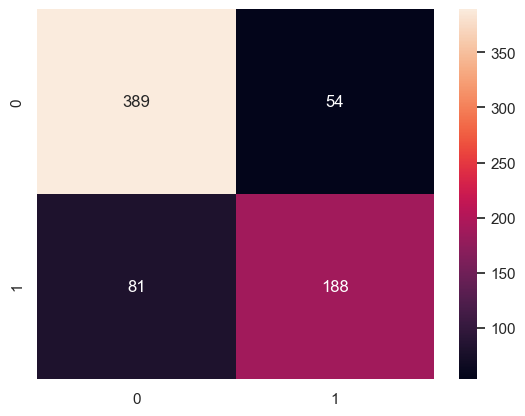

In [50]:
sns.heatmap(confusion_matrix(ytrain,y_predict_train), annot=True,fmt='g')

In [51]:
print(classification_report(ytrain,y_predict_train))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       443
           1       0.78      0.70      0.74       269

    accuracy                           0.81       712
   macro avg       0.80      0.79      0.79       712
weighted avg       0.81      0.81      0.81       712



In [52]:
# Test Accuracy

In [53]:
ytest

862    1
223    0
84     1
680    0
535    1
      ..
796    1
815    0
629    0
421    0
448    1
Name: Survived, Length: 179, dtype: int64

In [54]:
y_predict_test=logomodel.predict(xtest)

In [55]:
#accuracy_score=accuracy_score(ytest,y_predict_test)

In [56]:
confusion_matrix(ytest,y_predict_test)

array([[89, 17],
       [24, 49]], dtype=int64)

<Axes: >

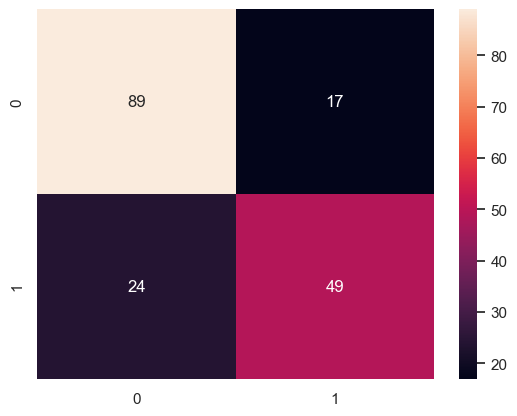

In [57]:
sns.heatmap(confusion_matrix(ytest,y_predict_test), annot=True,fmt='g')

In [58]:
print(accuracy_score)

0.8103932584269663


# precision recall F1-score

In [59]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [61]:
y_pred = logomodel.predict(xtest)

In [62]:
precision = precision_score(ytest, y_pred)
print(f"Precision: {precision:.2f}")

Precision: 0.74


In [65]:
recall = recall_score(ytest, y_pred)
print(f"Recall: {recall:.2f}")

Recall: 0.67


In [64]:
f1 = f1_score(ytest, y_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.71


# roc_score

In [66]:
# roc-receiver oprating charactristics  auc-area under the curve
from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y,logomodel.predict_proba (x)[:,1])

auc = roc_auc_score(ytrain,y_predict_train)


In [57]:
auc

0.7884271652386986

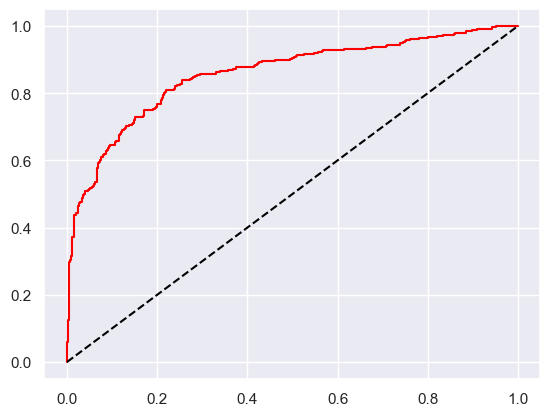

In [58]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')

# coefficients of the logistic regression model.

In [59]:
coefficients = logomodel.coef_[0]  # Coefficients for features
intercept = logomodel.intercept_[0] # # Intercept

In [60]:
coefficients = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': logomodel.coef_[0],
    'Odds Ratio': [round(np.exp(coef), 2) for coef in logomodel.coef_[0]]
})


In [61]:
print(coefficients)

        Feature  Coefficient  Odds Ratio
0   PassengerId     0.000739        1.00
1        Pclass    -0.332941        0.72
2          Name    -0.000530        1.00
3           Age    -0.022976        0.98
4         SibSp    -0.545941        0.58
5         Parch    -0.261991        0.77
6        Ticket    -0.000517        1.00
7          Fare     0.011334        1.01
8         Sex_0     1.426509        4.16
9         Sex_1    -1.203321        0.30
10   Embarked_0     0.127930        1.14
11   Embarked_1     0.215409        1.24
12   Embarked_2    -0.137549        0.87
13   Embarked_3     0.017399        1.02


# Deployment

In [67]:
import pickle
import streamlit as st

In [68]:
from pickle import dump

In [69]:
dump(logomodel,open('logomodel.pkl','wb')) #Serialzation

In [70]:
from pickle import load

In [71]:
loaded_model = load(open('logomodel.pkl','rb')) #Deserialzation

In [72]:
loaded_model.predict(xtest)

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [76]:
#!pip install streamlit

In [74]:
pip install scikit-learn pandas numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [67]:
#!stremlit run app.py

# Interview Questions

### 1. What is the difference between precision and recall?
#### - Precision:
- Definition: Measures the accuracy of positive predictions. It is the proportion of true positive predictions out of all predicted positives.
- Focus: Avoiding false positives.
- Use Case: Important when the cost of false positives is high (e.g., email spam detection).

#### - Recall:
- Definition: Measures the ability of a model to identify all actual positive cases. It is the proportion of true positives out of all actual - -positives.
- Focus: Avoiding false negatives.
- Use Case: Critical when missing a positive case has severe consequences (e.g., cancer detection).

#### - Key Difference:- 
Precision prioritizes the accuracy of positive predictions
- 
Recall focuses on capturing as many positive cases as possible- .
The trade-off between precision and recall can be balanced using the F1 Score, the harmonic mean of precision and recall.

#### 2. What is cross-validation, and why is it important in binary classification?
- Cross-Validation
Cross-validation is a statistical technique used to evaluate the performance and generalizability of a machine learning model. It involves splitting the dataset into multiple subsets (folds), training the model on a subset of the data, and testing it on the remaining data. This process is repeated several times, and the results are averaged to provide a more reliable estimate of the model's performance.

##### - Why Is Cross-Validation Important in Binary Classification?
- Prevents Overfitting:
Cross-validation ensures that the model is tested on unseen data multiple times, reducing the risk of overfitting to the training data.

- Reliable Performance Metrics:
Provides a robust estimate of metrics like accuracy, precision, recall, and F1-score by averaging results across folds.
Helps identify whether a model is biased toward one class in imbalanced datasets.

- Utilizes the Dataset Efficiently:
Ensures all data points are used for both training and validation, especially important for small datasets.

- Model Selection:
Helps in comparing different models or hyperparameter settings to choose the best-performing one.

- Detects Variance:
Highlights if a model’s performance is stable across different subsets of the data, indicating robustness.

#### Example:
- For 5-fold cross-validation:
- Split data into 5 parts: A, B, C, D, E.
- Train on A+B+C+D and test on E.
- Repeat by testing on D, C, B, and A, then average the results.